## Linear Models for Weather Forecasting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
fpath_training = "/Users/Shared/scratch/ml_weather_forecasting/gfs_obs_training_2022_2025.parquet"
df_train = pl.read_parquet(fpath_training)

# Data contains NaN :(
df_train = df_train.with_columns(
    pl.col("t2m_gfs").fill_nan(None).fill_null(strategy="forward"),
    pl.col("t2m").fill_nan(None).fill_null(strategy="forward"),
    pl.col("ws10m_gfs").fill_nan(None).fill_null(strategy="forward"),
    pl.col("ws10m").fill_nan(None).fill_null(strategy="forward"),
    )
df_train

valid_time,t2m,ws10m,t2m_gfs,ws10m_gfs,hour,dayofyear
datetime[μs],f32,f32,f64,f64,i8,i16
2022-10-24 00:50:00,13.0,1.543337,12.565804,4.55572,0,297
2022-10-24 01:50:00,13.0,4.115565,11.610275,5.277184,1,297
2022-10-24 02:50:00,13.0,5.144456,11.047924,5.928077,2,297
2022-10-24 03:50:00,13.0,4.115565,11.004769,6.72317,3,297
2022-10-24 04:50:00,13.0,5.144456,11.365268,6.685297,4,297
…,…,…,…,…,…,…
2025-10-24 14:50:00,12.0,6.687793,9.135103,8.457618,14,297
2025-10-24 15:50:00,11.0,6.687793,9.380849,8.473314,15,297
2025-10-24 16:50:00,10.0,5.144456,9.124081,8.108024,16,297


$t2m_{obs} = \alpha*t2m_{GFS} + \beta$

In [3]:
train = df_train.filter(pl.col("valid_time") < pl.datetime(2025,5,1))
test = df_train.filter(pl.col("valid_time") >= pl.datetime(2025,5,1))

X_train = train.select(["t2m_gfs", "dayofyear", "hour", "ws10m_gfs"])
y_train = train.select(["t2m"])

X_test = test.select(["t2m_gfs", "dayofyear", "hour", "ws10m_gfs"])
y_test = test.select(["t2m"])

In [4]:
model = LinearRegression()

model.fit(X_train, y_train)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


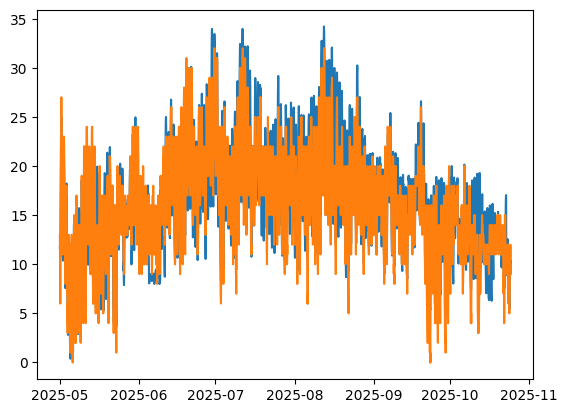

In [5]:
y_pred = model.predict(X_test)

plt.plot(test.select("valid_time"), y_pred)
plt.plot(test.select("valid_time"), y_test)

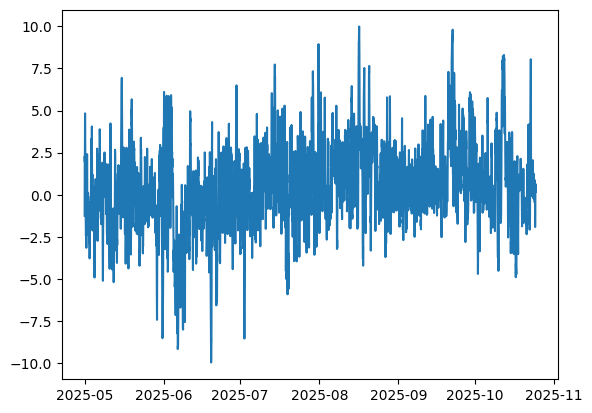

In [6]:
plt.plot(test.select("valid_time"), y_pred - y_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
model.coef_, model.intercept_